# Introduction

The dataset titled **"Employability Classification of Over 70,000 Job Applicants"** contains a comprehensive collection of information regarding job applicants and their respective employability scores. This dataset has been compiled to assist organizations and recruiters in evaluating the suitability of candidates for various employment opportunities. By utilizing **machine learning techniques**, this dataset aims to provide valuable insights into the factors influencing employability and enhance the efficiency of the hiring process.

## Dataset Overview

From the survey results, we have built a dataset with the following columns:

- **Age**: Age of the applicant, classified as:
  - '> 35 years old' 
  - '< 35 years old' (Categorical)
  
- **EdLevel**: Education level of the applicant:
  - Undergraduate
  - Master
  - PhD (Categorical)
  
- **Gender**: Gender of the applicant:
  - Man
  - Woman
  - NonBinary (Categorical)
  
- **MainBranch**: Whether the applicant is a professional developer (Categorical)

- **YearsCode**: How long the applicant has been coding (Integer)

- **YearsCodePro**: How long the applicant has been coding in a professional context (Integer)

- **PreviousSalary**: The applicant's previous job salary (Float)

- **ComputerSkills**: The number of computer skills known by the applicant (Integer)

- **Employed**: Target variable, whether the applicant has been hired (Categorical)

## Source

You can find the dataset on Kaggle via this [link](https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource).


**Loading the Dataset**

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('stackoverflow_full.csv')

# Drop the 'Unnamed: 0' column as it seems unnecessary (index column)
df = df.drop(columns=['Unnamed: 0'])

# Display metadata
metadata = {
    "Dataset Name": "Employability Classification of Over 70,000 Job Applicants",
    "Number of Rows": df.shape[0],
    "Number of Columns": df.shape[1],
    "Columns": list(df.columns),
    "Missing Values": df.isnull().sum().sum()
}

print(metadata)
df.head()


{'Dataset Name': 'Employability Classification of Over 70,000 Job Applicants', 'Number of Rows': 73462, 'Number of Columns': 14, 'Columns': ['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country', 'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed'], 'Missing Values': np.int64(63)}


,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


**Handling Missing Values**

In [11]:
# Fill missing values in numerical columns with their median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with their mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that no missing values remain
print(df.isnull().sum())


Age               0
Accessibility     0
EdLevel           0
Employment        0
Gender            0
MentalHealth      0
MainBranch        0
YearsCode         0
YearsCodePro      0
Country           0
PreviousSalary    0
HaveWorkedWith    0
ComputerSkills    0
Employed          0
dtype: int64


C:\Users\hrest\AppData\Local\Temp\ipykernel_22756\3409634699.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


**Descriptive Statistical Analysis for Numerical Variables**

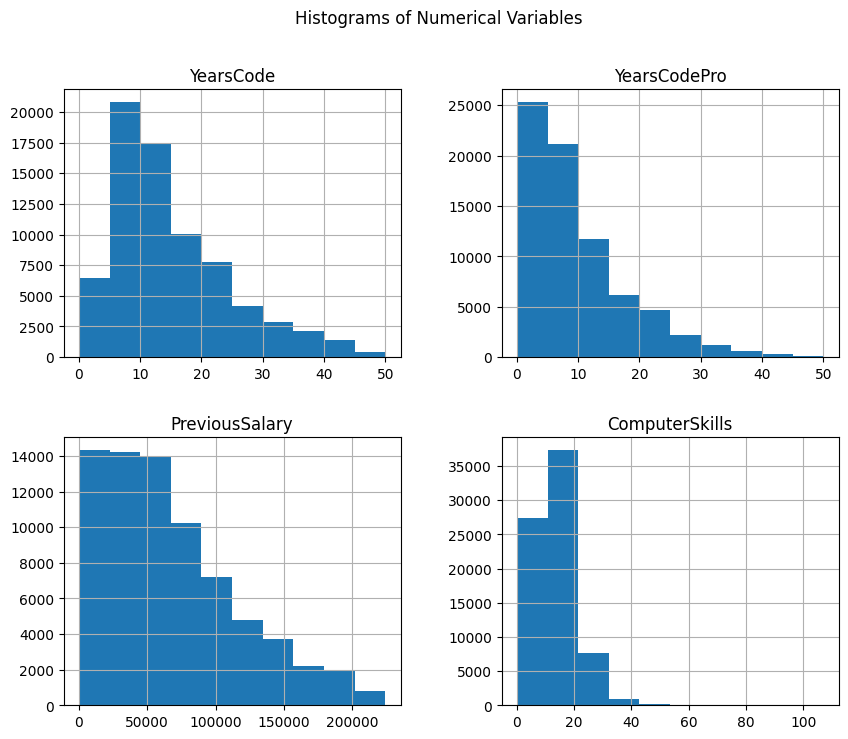

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = ['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']

# Plot histograms of frequencies for numerical variables
df[numerical_cols].hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

### Histograms of Numerical Variables

1. **YearsCode**: 
   - The majority of job applicants have less than 20 years of coding experience, with a peak around 7 to 10 years.
   - The distribution is right-skewed, indicating that fewer people have extensive coding experience beyond 20 years.

2. **YearsCodePro**: 
   - The distribution of professional coding experience is heavily skewed towards fewer years of experience.
   - Most applicants have less than 10 years of professional coding experience, with very few having more than 20 years of experience.

3. **PreviousSalary**:
   - The salary distribution shows that the majority of applicants have a previous salary of less than $50,000.
   - The distribution is right-skewed, with some outliers earning significantly higher salaries.

4. **ComputerSkills**:
   - Most applicants have around 15-20 computer skills, with very few possessing more than 50.
   - The histogram reveals that the number of computer skills sharply declines after 30, indicating that most applicants possess a moderate range of technical skills.


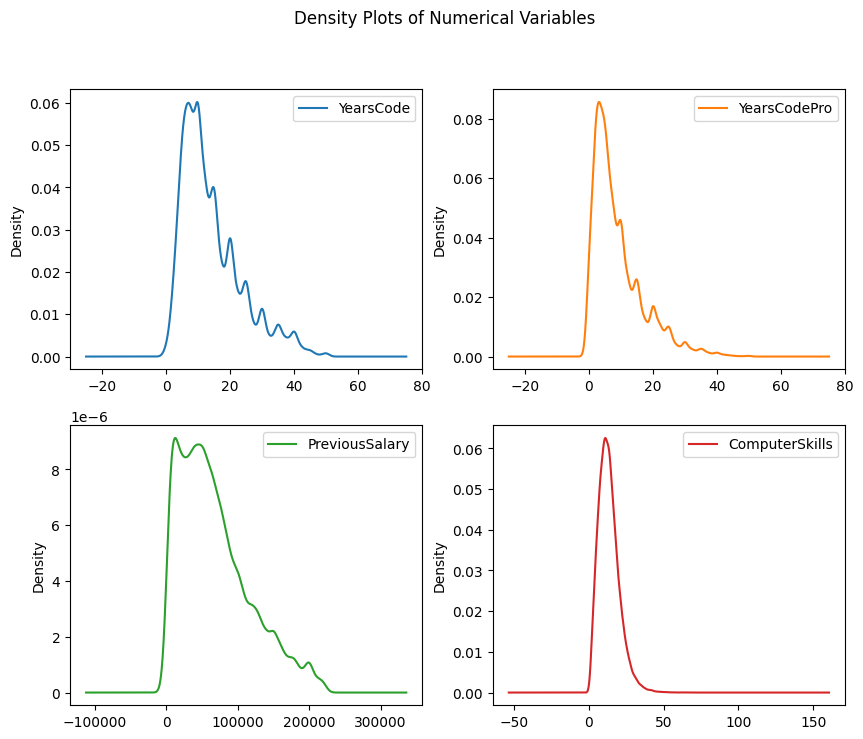

In [14]:
# Plot histograms of densities
df[numerical_cols].plot(kind='density', subplots=True, layout=(2, 2), figsize=(10, 8), sharex=False)
plt.suptitle('Density Plots of Numerical Variables')
plt.show()

### Density Plots of Numerical Variables

1. **YearsCode**:
   - The density plot shows a peak around 7-10 years of coding experience.
   - There is a rapid decline after 10 years, with very few applicants having more than 40 years of experience.
   - The long tail on the right side indicates that a small number of applicants have extensive experience, but this is rare.

2. **YearsCodePro**:
   - Professional coding experience is concentrated below 10 years, as shown by the high peak in the 0-5 years range.
   - There is a significant drop in density beyond 10 years of professional experience, similar to `YearsCode`, but more pronounced.

3. **PreviousSalary**:
   - The distribution of previous salary is heavily skewed towards lower values, with most applicants earning below $50,000.
   - There are a few outliers with very high salaries, which extend the tail, but they make up a small fraction of the population.

4. **ComputerSkills**:
   - The density of computer skills peaks sharply around 10-20 skills, indicating that most applicants possess a moderate number of technical skills.
   - The plot has a narrow concentration, suggesting that a majority of applicants have a similar range of skills, with very few possessing more than 50 skills.


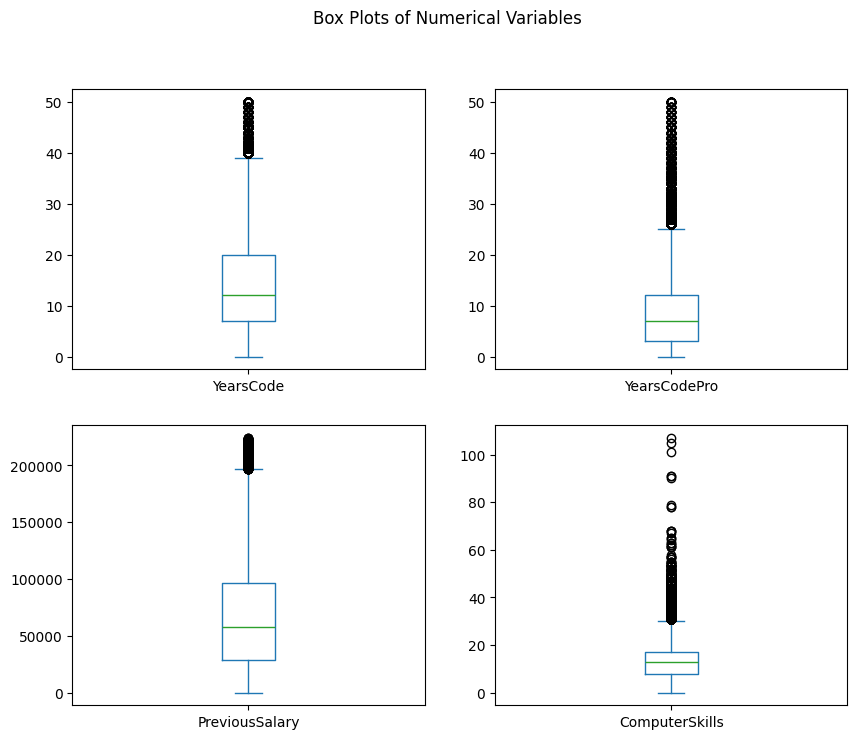

In [15]:
# Boxplots for numerical variables to detect outliers
df[numerical_cols].plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 8), sharex=False)
plt.suptitle('Box Plots of Numerical Variables')
plt.show()

### Box Plots of Numerical Variables

1. **YearsCode**:
   - The median years of coding experience is around 10 years.
   - The plot shows several outliers above 30 years, indicating that while most applicants have less experience, a small number of applicants report significantly higher years of coding.
   - The interquartile range (IQR) suggests that the majority of applicants have between 5 and 20 years of experience.

2. **YearsCodePro**:
   - The median for professional coding experience is less than 10 years, which is lower than the overall coding experience in `YearsCode`.
   - A large number of outliers appear above 30 years of professional experience, though the bulk of the data falls below 15 years.
   - The IQR shows that most applicants have between 5 and 12 years of professional experience.

3. **PreviousSalary**:
   - The median salary is around 50,000 dollars, with a large range of salaries, but a significant number of outliers appear above 150,000 dollars.
   - Most of the applicants’ previous salaries are concentrated below $100,000, with a long upper whisker indicating higher earners.

4. **ComputerSkills**:
   - The median number of computer skills is around 10-15.
   - There are numerous outliers, especially beyond 40 skills, suggesting a small group of applicants with an exceptionally high number of technical skills.
   - The IQR indicates that most applicants have between 10 and 20 computer skills.


In [16]:
# Calculate statistical metrics (mean, median, std, etc.)
print(df[numerical_cols].describe())

          YearsCode  YearsCodePro  PreviousSalary  ComputerSkills
count  73462.000000  73462.000000    73462.000000    73462.000000
mean      14.218902      9.098377    67750.260611       13.428221
std        9.405172      7.960201    49488.142118        7.057835
min        0.000000      0.000000        1.000000        0.000000
25%        7.000000      3.000000    28839.000000        8.000000
50%       12.000000      7.000000    57588.000000       13.000000
75%       20.000000     12.000000    95979.000000       17.000000
max       50.000000     50.000000   224000.000000      107.000000


### Descriptive Statistics for Numerical Variables

1. **YearsCode**:
   - **Mean**: The average coding experience is about 14.2 years.
   - **Median (50%)**: The median is 12 years, indicating that half of the applicants have less than 12 years of coding experience.
   - **Standard Deviation**: The spread in the years of coding is relatively large (9.4 years), showing a wide range of experience levels.
   - **Min/Max**: The minimum is 0 years, and the maximum is 50 years of coding experience.

2. **YearsCodePro**:
   - **Mean**: The average professional coding experience is about 9 years.
   - **Median (50%)**: The median is 7 years, meaning half of the applicants have less than 7 years of professional coding experience.
   - **Standard Deviation**: The standard deviation is about 7.96, indicating some variability, but most applicants are concentrated around the mean.
   - **Min/Max**: The range is from 0 to 50 years of professional experience.

3. **PreviousSalary**:
   - **Mean**: The average previous salary is 67,750 dollars.
   - **Median (50%)**: The median salary is 57,585 dollars, indicating that half of the applicants earn less than this amount.
   - **Standard Deviation**: The salary distribution has a large spread (49,488 dollars), meaning there is a wide variation in applicants' salaries.
   - **Min/Max**: The salaries range from 1 dollar to 224,000 dollars, with significant outliers on the upper end.

4. **ComputerSkills**:
   - **Mean**: The average number of computer skills possessed by applicants is 13.4.
   - **Median (50%)**: The median is 13 skills, suggesting that half of the applicants have 13 or fewer skills.
   - **Standard Deviation**: The standard deviation is 7.05, indicating some variability in skill levels.
   - **Min/Max**: The range is from 0 to 107 skills, with a few applicants possessing an exceptionally high number of skills.


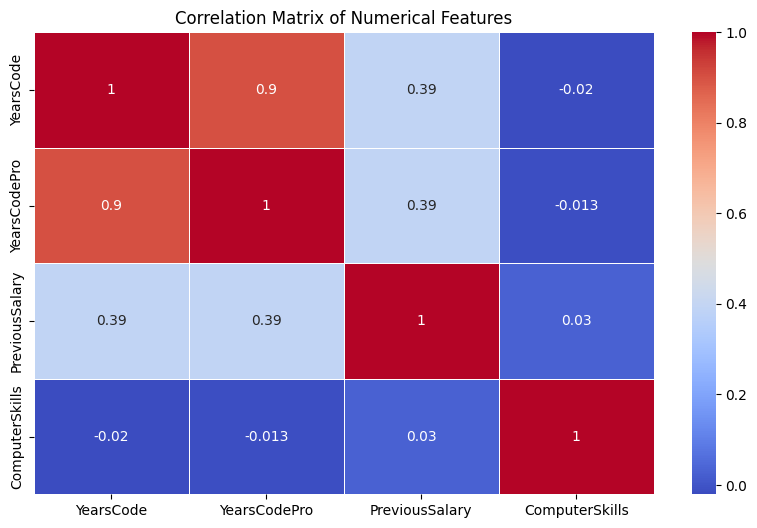

In [17]:
# Correlation matrix and heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Correlation Matrix of Numerical Features

1. **YearsCode and YearsCodePro**:
   - There is a strong positive correlation (0.9) between `YearsCode` and `YearsCodePro`, which is expected as professional coding experience is typically a subset of overall coding experience.
   - This high correlation indicates that applicants who have more overall coding experience also tend to have more professional experience.

2. **YearsCode and PreviousSalary**:
   - There is a moderate positive correlation (0.39) between `YearsCode` and `PreviousSalary`, suggesting that applicants with more years of coding experience tend to have higher previous salaries.
   - However, the correlation is not very high, meaning that factors other than coding experience influence salary.

3. **YearsCodePro and PreviousSalary**:
   - Similar to `YearsCode`, there is a moderate positive correlation (0.39) between `YearsCodePro` and `PreviousSalary`, showing that professional experience also contributes to higher salaries.

4. **ComputerSkills and the Other Features**:
   - `ComputerSkills` shows very weak or no correlation with the other features (correlations close to 0).
   - This suggests that the number of computer skills an applicant has is relatively independent of their years of coding, professional experience, or salary.


**Descriptive Statistical Analysis for Categorical Variables**

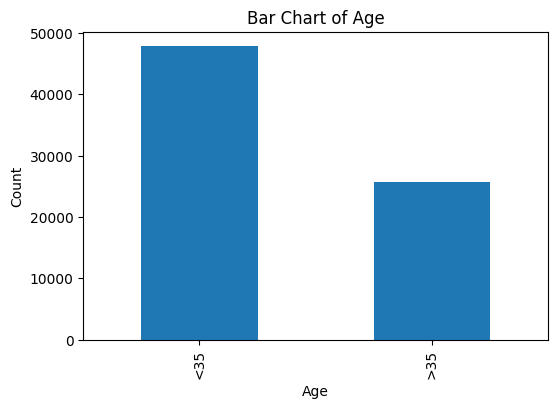

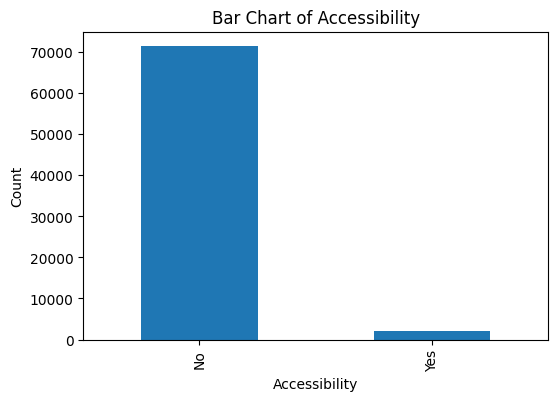

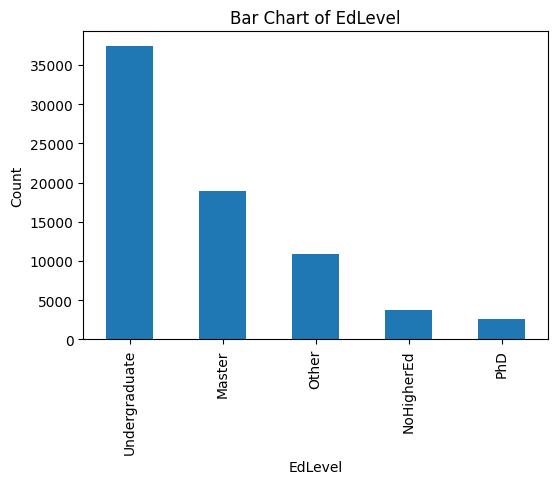

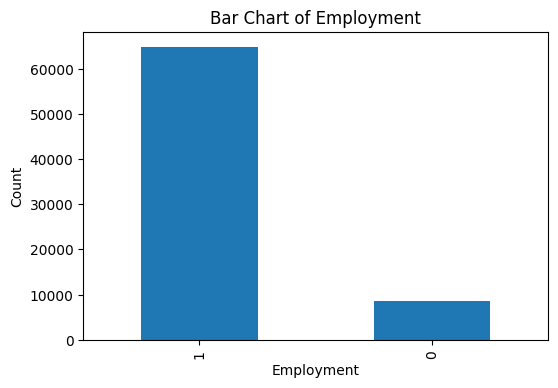

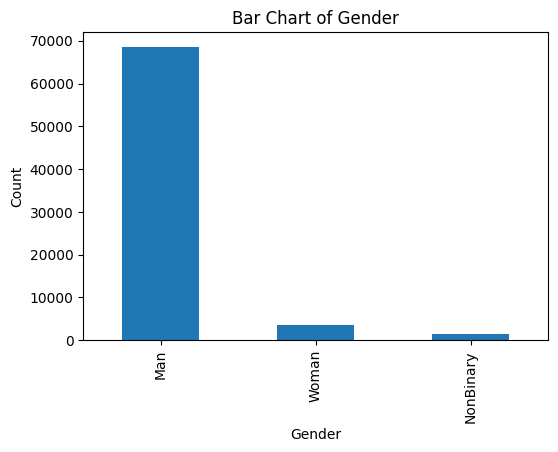

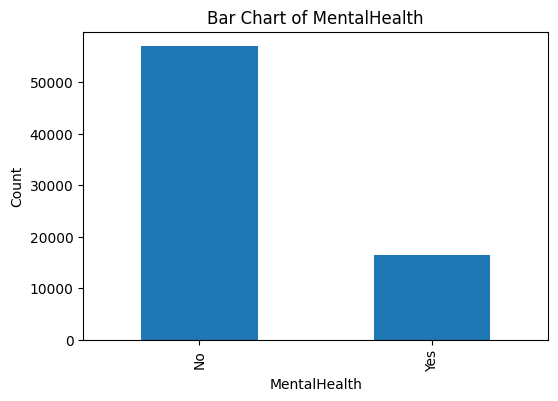

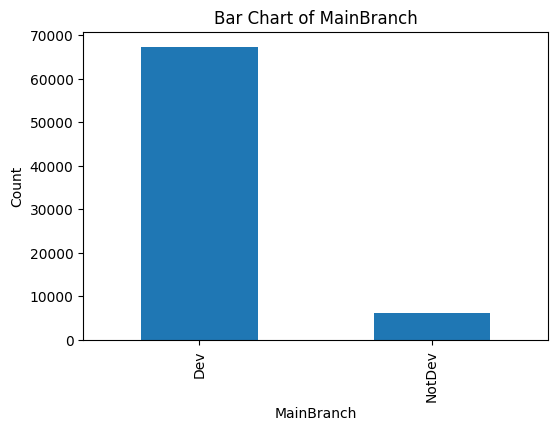

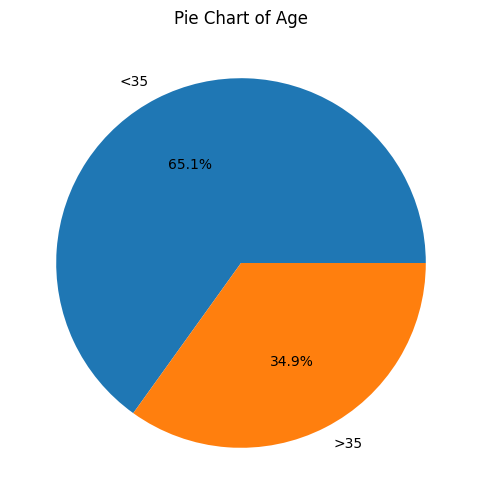

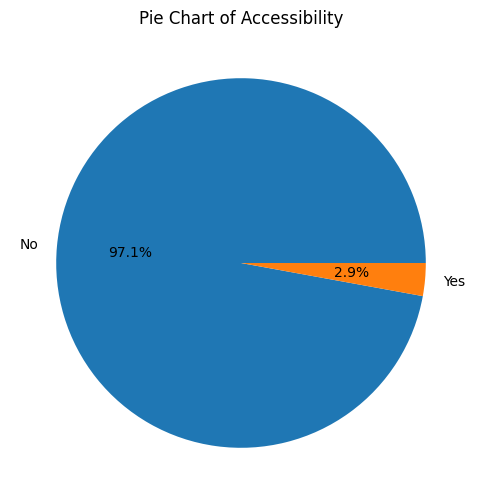

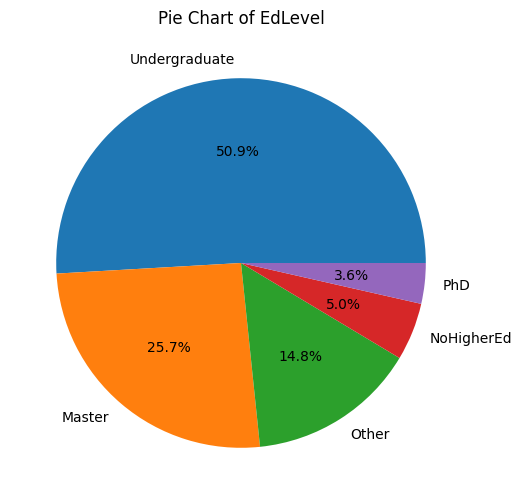

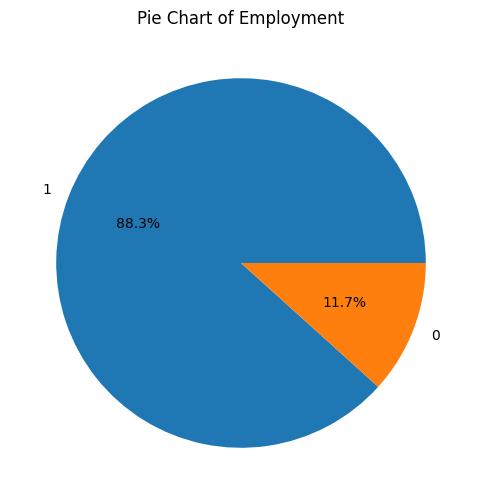

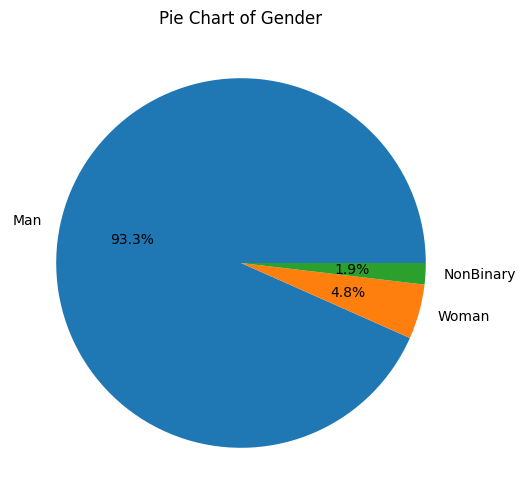

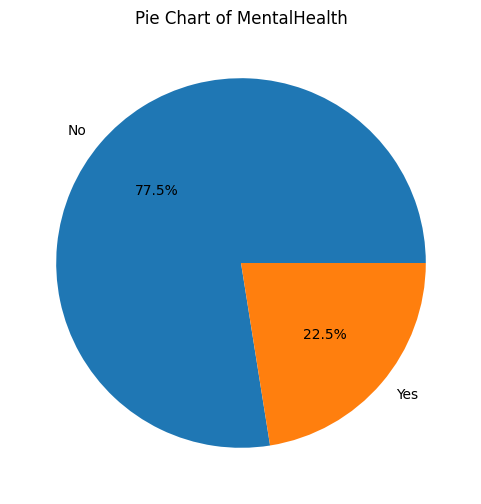

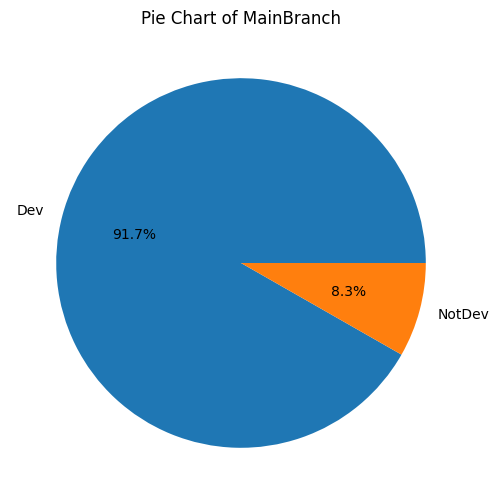

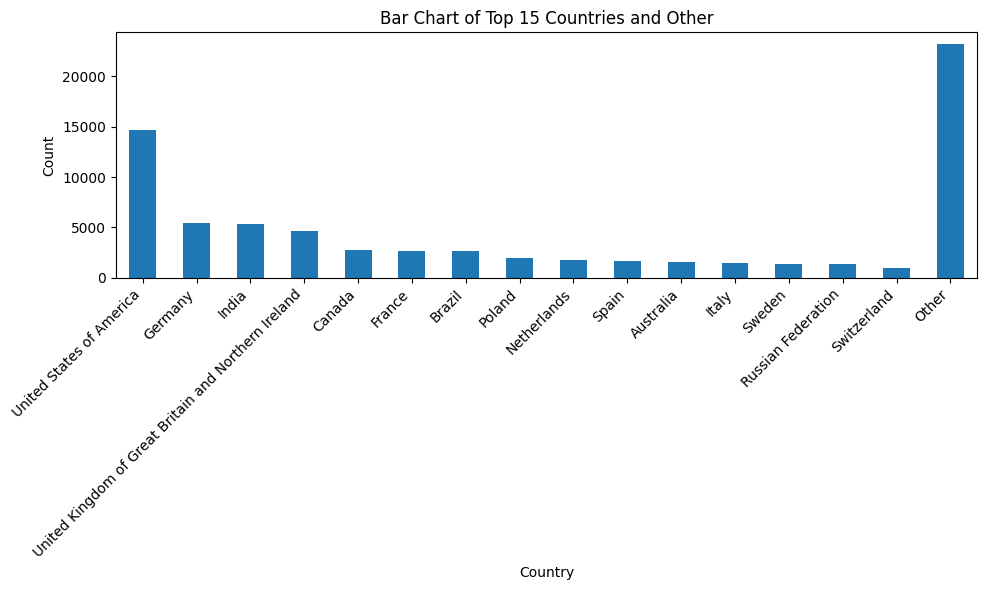

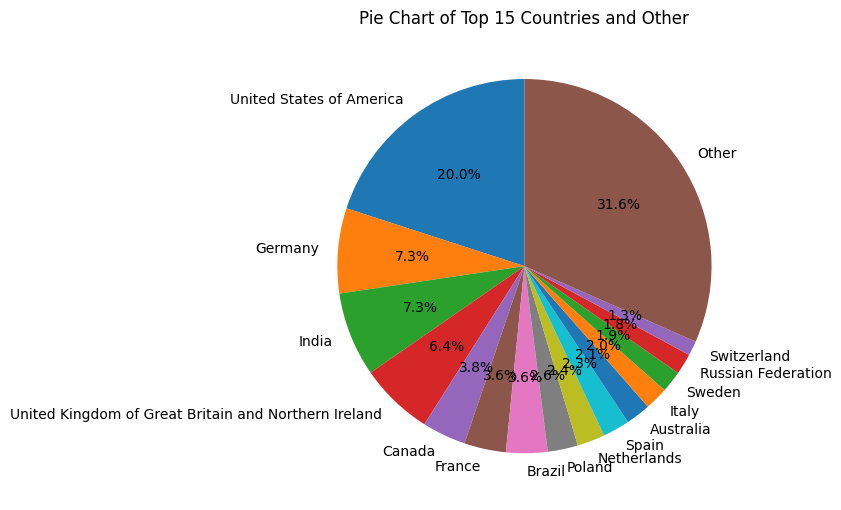

In [23]:
# Bar charts for categorical variables (absolute frequencies)
categorical_cols = ['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth', 'MainBranch']

for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', figsize=(6, 4), title=f'Bar Chart of {col}')
    plt.ylabel('Count')
    plt.show()

# Pie charts for categorical variables (relative frequencies)
for col in categorical_cols:
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title=f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()

# Bar chart for the top 15 countries + 'Other'
top_countries = df['Country'].value_counts().nlargest(15)
other_countries_count = df['Country'].value_counts().sum() - top_countries.sum()

# Create a new series with top countries and add 'Other' as a category
top_countries['Other'] = other_countries_count

# Plot the bar chart for the top 15 countries + 'Other'
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', title='Bar Chart of Top 15 Countries and Other')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Pie chart for 'Country' with limited categories and grouping small ones under 'Other'
plt.figure(figsize=(8, 8))
top_countries.plot(kind='pie', autopct='%1.1f%%', title='Pie Chart of Top 15 Countries and Other', startangle=90)
plt.ylabel('')
plt.tight_layout()
plt.show()

### Bar Chart of Age
- The majority of the applicants (over 45,000) are below 35 years of age.
- Only around 25,000 applicants are older than 35, indicating that the dataset is skewed toward younger applicants.

### Bar Chart of Accessibility
- Most applicants (around 70,000) reported not having accessibility needs, while only a small fraction (around 4,000) reported needing accessibility accommodations.

### Bar Chart of EdLevel
- A large portion of the applicants have an undergraduate degree, making up the majority (~35,000).
- The second largest group has a Master's degree (~15,000).
- Very few applicants have a PhD or no higher education, with "PhD" and "NoHigherEd" categories having fewer than 5,000 applicants each.
  
### Bar Chart of Employment
- A majority of the applicants (around 63,000) are currently employed (represented by `1`), while only a small portion (~10,000) are unemployed (represented by `0`).
- This shows that most of the applicants in this dataset are already engaged in some form of employment.

### Bar Chart of Gender
- The dataset is heavily dominated by men, with over 65,000 applicants identifying as men.
- A much smaller number of applicants identify as women (around 5,000), and even fewer identify as non-binary (~1,000).

### Bar Chart of MentalHealth
- The majority of the applicants (~55,000) reported no mental health conditions.
- A smaller, yet significant, portion (~15,000) reported having mental health conditions.
- This shows that mental health data was provided by a meaningful proportion of the applicants.

### Bar Chart of MainBranch
- The vast majority of applicants (~67,000) identify themselves as "Dev" (developers).
- Only a small fraction (~6,000) identify as "NotDev", indicating that the dataset is heavily skewed toward developer roles.

### Pie Chart of Age
- **65.1%** of the applicants are under 35 years of age, showing that the majority of job seekers in this dataset are younger than 35.
- **34.9%** of applicants are older than 35, indicating a smaller proportion of older applicants in the dataset.

### Pie Chart of Accessibility
- **97.1%** of the applicants do not have accessibility needs, while only **2.9%** reported having accessibility requirements.
- This suggests that most applicants in this dataset do not have specific accessibility needs, with a small minority who do.

### Pie Chart of Education Level (EdLevel)
- **50.9%** of the applicants have an undergraduate degree, making it the most common education level.
- **25.7%** of the applicants hold a Master's degree.
- A smaller portion of the applicants, **14.8%**, fall into the "Other" education category, while **5.0%** reported no higher education, and only **3.6%** have a PhD.
- This indicates that the majority of applicants have at least an undergraduate or Master's level education.

### Pie Chart of Employment
- **88.3%** of the applicants are currently employed (represented by `1`), while **11.7%** are not employed (represented by `0`).
- This shows that the majority of applicants are already in employment, with only a small fraction currently unemployed.

### Pie Chart of Gender
- **93.3%** of the applicants identify as men, making up the vast majority of the dataset.
- **4.8%** identify as women, and only **1.9%** identify as non-binary.
- This indicates that the dataset is highly skewed towards men, with a small representation of women and non-binary individuals.

### Pie Chart of Mental Health
- **77.5%** of applicants reported no mental health issues, while **22.5%** indicated they have mental health conditions.
- This suggests that a notable portion of the applicants have mental health concerns, but the majority do not.

### Pie Chart of MainBranch
- **91.7%** of the applicants identify as developers (Dev), while only **8.3%** do not identify as developers (NotDev).
- This indicates that the majority of the applicants in this dataset are involved in development roles.

### Bar Chart of Top 15 Countries and Other
- The United States of America represents the largest group, with over 20,000 applicants.
- Germany and India follow, each contributing **7.3%** of the total applicants.
- The United Kingdom, Canada, and France also represent notable portions of the dataset, but after the top countries, the chart shows a sharp decline in representation.
- Smaller countries are grouped under the "Other" category, making up **31.6%** of the total.

### Pie Chart of Top 15 Countries and Other
- The **United States of America** makes up **20.0%** of the applicants, followed by **Germany** and **India**, both at **7.3%**.
- The **United Kingdom** accounts for **6.4%**, while **Canada**, **France**, and **Brazil** each make up smaller portions.
- The "Other" category, which includes countries with fewer applicants, makes up the largest portion of the chart at **31.6%**.



**Grouped Analysis for Categorical Variables**

<Figure size 1000x600 with 0 Axes>

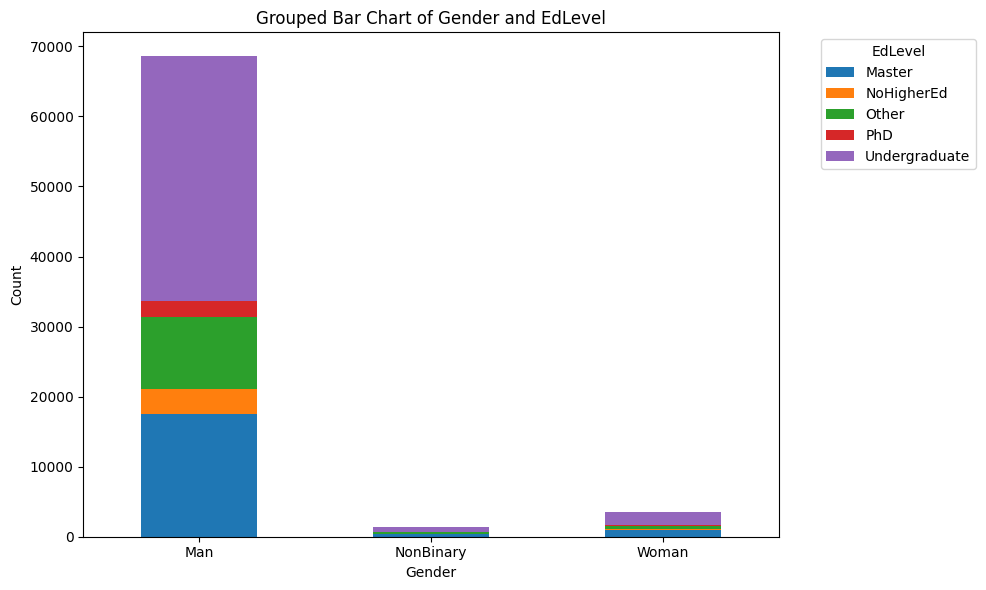

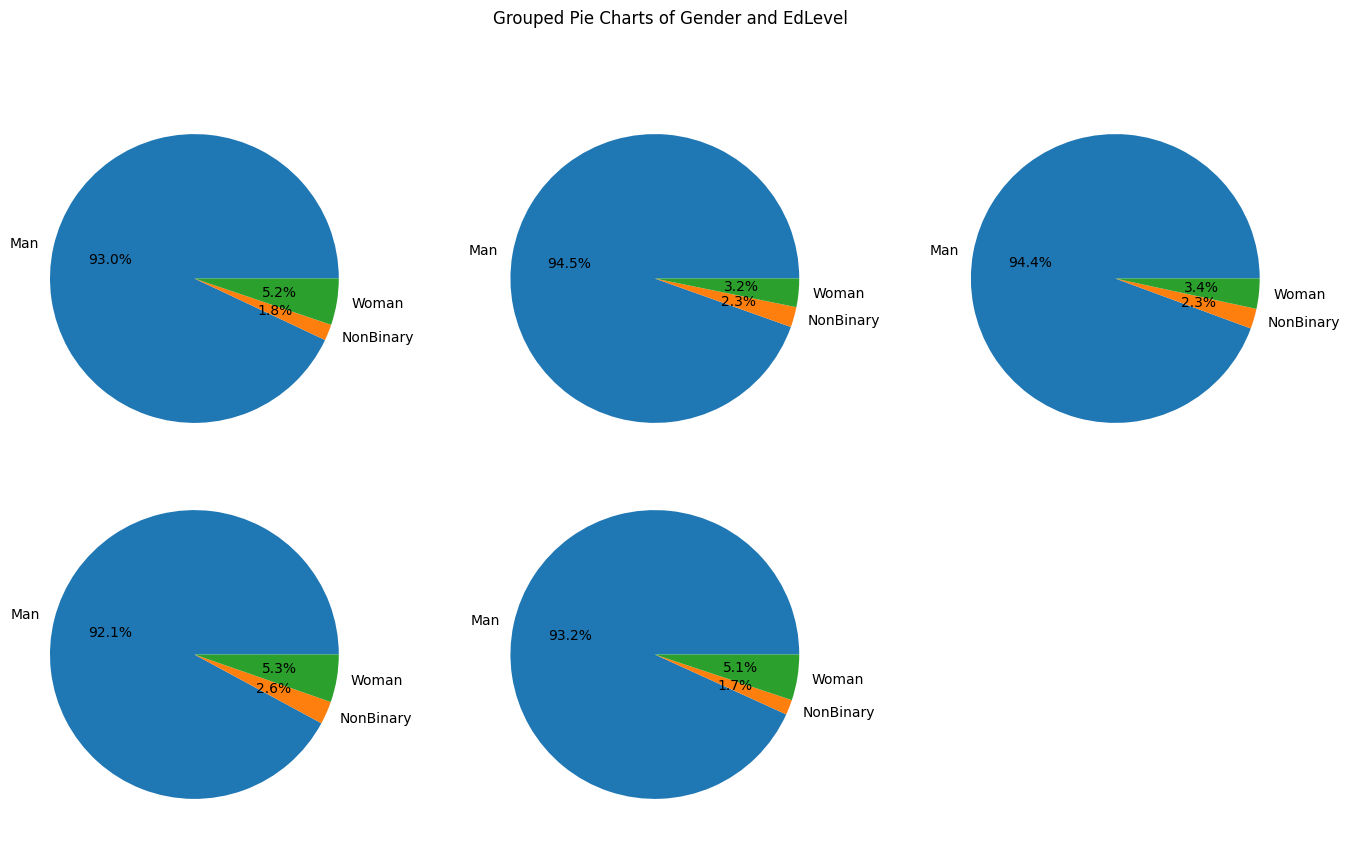

In [26]:
# Group by two categorical variables (e.g., Gender and EdLevel)
grouped_data = df.groupby(['Gender', 'EdLevel']).size().unstack()

# Grouped bar chart with improved layout
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Grouped Bar Chart of Gender and EdLevel')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.legend(title='EdLevel', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside of chart
plt.tight_layout()
plt.show()

# Grouped pie charts for the same categories
# Adjust subplots to make pie charts readable (5 charts)
fig, axes = plt.subplots(2, 3, figsize=(14, 8))  # Create a 2x3 grid, but will only use 5 axes
grouped_data.plot(kind='pie', subplots=True, autopct='%1.1f%%', ax=axes.flatten()[:5], legend=False)
plt.suptitle('Grouped Pie Charts of Gender and EdLevel', y=1.05)

for ax in axes.flatten()[5:]:  # Hide the extra unused subplot
    ax.axis('off')

for ax in axes.flatten()[:5]:
    ax.set_ylabel('')  # Remove y-axis labels for clarity

plt.tight_layout()
plt.show()

### Grouped Bar Chart of Gender and EdLevel
- The majority of applicants who identify as **men** have undergraduate degrees, making this the largest group in the dataset.
- There are fewer applicants who identify as **women** and **non-binary**, but they are represented across all education levels, with most holding undergraduate degrees.
- Across all genders, undergraduate education is the most common, followed by Master's degrees and other types of education.
- **Men** dominate the dataset in terms of numbers, with relatively fewer applicants identifying as **women** or **non-binary**.

### Grouped Pie Charts of Gender and EdLevel
- **Undergraduate** applicants are predominantly men, accounting for **93.0%** of this group, with **5.2%** identifying as women and **1.8%** as non-binary.
- For those with **Master's** degrees, **94.5%** are men, **3.2%** women, and **2.3%** non-binary.
- **PhD** applicants are similarly dominated by men (**94.4%**), with women and non-binary individuals making up **3.4%** and **2.3%**, respectively.
- Among applicants with **Other** education, **92.1%** are men, **5.3%** are women, and **2.6%** are non-binary.
- For those with **No Higher Education**, **93.2%** are men, **5.1%** are women, and **1.7%** are non-binary.

This breakdown shows a clear gender disparity across all education levels, with men being the dominant group, while women and non-binary applicants are represented in smaller numbers.
